In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mp

In [2]:
upvotes = pd.read_csv('E:/Great Lakes/Analytics vidya/Predict number of upvotes/train_NIR5Yl1.csv')

In [3]:
upvotes.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
upvotes.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [5]:
upvotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
ID            330045 non-null int64
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [6]:
upvotes1 = upvotes.drop("ID",axis=1)

In [7]:
upvotes1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 6 columns):
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ MB


In [8]:
upvotes[upvotes.isnull().any(axis=1)].head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes


In [9]:
upvotes1["Tag"] = upvotes1["Tag"].astype('category')
upvotes1["Tag"] = upvotes1["Tag"].cat.codes
upvotes1.head()

,Tag,Reputation,Answers,Username,Views,Upvotes
0,0,3942.0,2.0,155623,7855.0,42.0
1,0,26046.0,12.0,21781,55801.0,1175.0
2,1,1358.0,4.0,56177,8067.0,60.0
3,0,264.0,3.0,168793,27064.0,9.0
4,1,4271.0,4.0,112223,13986.0,83.0


In [58]:
Q1 = upvotes1.quantile(0.25)
Q3 = upvotes1.quantile(0.75)
IQR = Q3 - Q1


In [59]:
print(IQR)

Tag               5.0
Reputation     4836.0
Answers           3.0
Username      82751.0
Views         24276.0
Upvotes          99.0
dtype: float64


In [63]:
upvotes2 = pd.DataFrame(upvotes1[~((upvotes1 < (Q1 - 1.5 * IQR)) |(upvotes1 > (Q3 + 1.5 * IQR))).any(axis=1)])

In [66]:
upvotes2.shape

(243563, 6)

In [67]:
upvotes1.shape

(330045, 6)

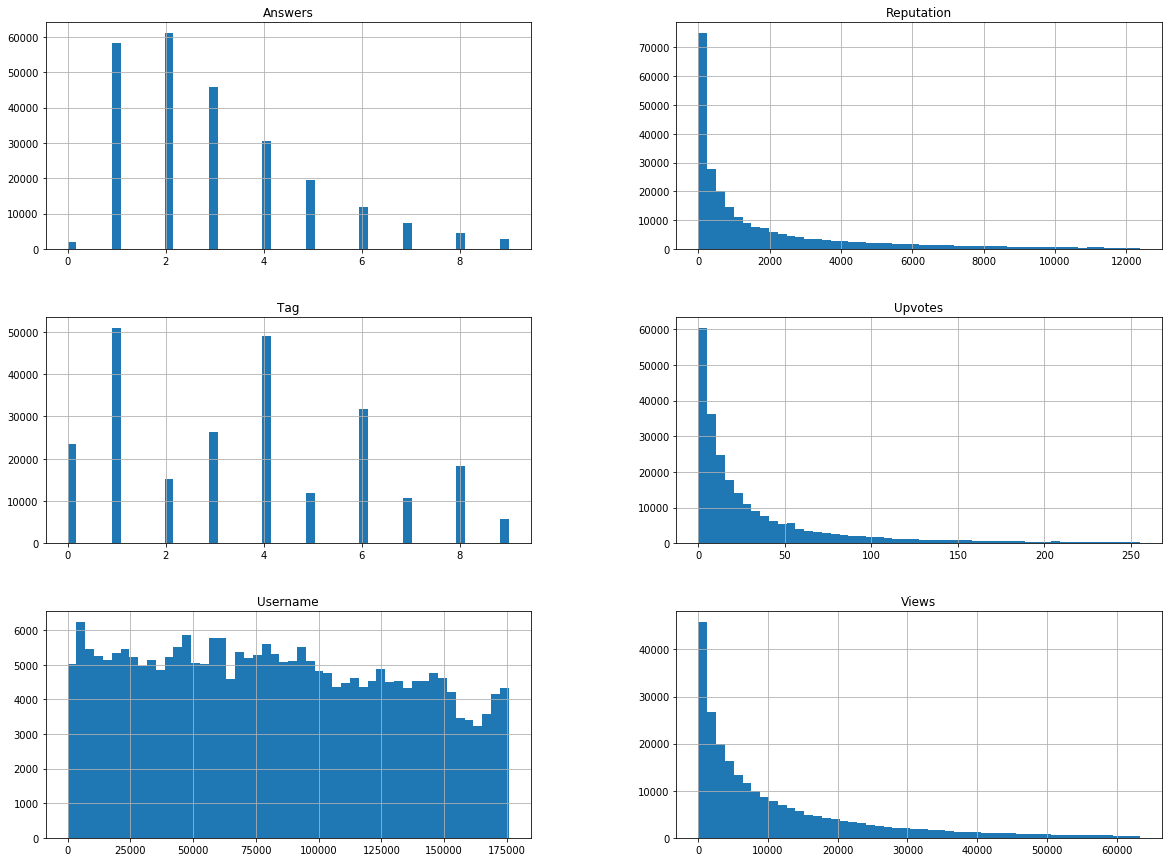

In [61]:
upvotes2.hist(bins=50, figsize=(20,15))
plt.show()

In [68]:
corr_matrix = upvotes1.corr()

In [69]:
print(corr_matrix)

                 Tag  Reputation   Answers  Username     Views   Upvotes
Tag         1.000000   -0.031940 -0.080509  0.010978 -0.056310 -0.069659
Reputation -0.031940    1.000000  0.066435 -0.077603 -0.024987  0.463234
Answers    -0.080509    0.066435  1.000000 -0.003289  0.393862  0.271179
Username    0.010978   -0.077603 -0.003289  1.000000  0.013684 -0.038889
Views      -0.056310   -0.024987  0.393862  0.013684  1.000000  0.492055
Upvotes    -0.069659    0.463234  0.271179 -0.038889  0.492055  1.000000


In [13]:
import seaborn as sns

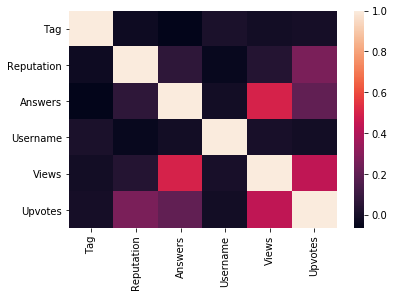

In [14]:
sns.heatmap(corr_matrix)

In [70]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(upvotes1, test_size=0.2, random_state=42)

In [71]:
x_train_set = train_set[train_set.columns[0:5]]
y_train_set = train_set['Upvotes']

In [72]:
x_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194850 entries, 246399 to 165189
Data columns (total 5 columns):
Tag           194850 non-null int8
Reputation    194850 non-null float64
Answers       194850 non-null float64
Username      194850 non-null int64
Views         194850 non-null float64
dtypes: float64(3), int64(1), int8(1)
memory usage: 7.6 MB


In [73]:
x_test_set = test_set[test_set.columns[0:5]]
y_test_set = test_set['Upvotes']

In [74]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train_set, y_train_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print (lin_reg.intercept_,lin_reg.coef_)
y_pred = lin_reg.predict(x_test_set)

-2.097423468024175 [-4.01731550e-01  8.43543887e-03  1.15324600e+00 -7.60758321e-06
  1.66416874e-03]


In [76]:
from sklearn.metrics import mean_squared_error

upvotes_predictions = lin_reg.predict(x_test_set)
lin_mse = mean_squared_error(y_test_set, upvotes_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

33.02013291988572

In [77]:
# Trianing Error
upvotes_predictions1 = lin_reg.predict(x_train_set)
lin_mse1 = mean_squared_error(y_train_set, upvotes_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

32.96440983254343

In [78]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test_set, upvotes_predictions)
lin_mae

20.71812723460573

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train_set, y_train_set)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [80]:
upvotes_predictions_tree = tree_reg.predict(x_test_set)
tree_mse = mean_squared_error(y_test_set, upvotes_predictions_tree)
tree_rmse = np.sqrt(lin_mse)
tree_rmse

33.02013291988572

In [81]:
#Training Error
upvotes_predictions_tree1 = tree_reg.predict(x_train_set)
tree_mse1 = mean_squared_error(y_train_set, upvotes_predictions_tree1)
tree_rmse1 = np.sqrt(lin_mse1)
tree_rmse1

32.96440983254343

In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [37.40932481 37.28078343 38.19356452 37.22085567 37.49432803 37.9750036
 38.17792644 37.75852602 37.79915454 38.29794129]
Mean: 37.76074083317805
Standard deviation: 0.37598639070898243


In [28]:
scores = cross_val_score(lin_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [2442.1226294  4069.44263076 2572.514539   3414.80788805 1961.32114012
 1930.54449207 2399.28159614 3346.58725479 2866.17287778 4124.31349894]
Mean: 2912.7108547050525
Standard deviation: 756.2482979459965


In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_train_set, y_train_set)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
forest_predictions = forest_reg.predict(x_test_set)
forest_mse = mean_squared_error(y_test_set, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

28.079586565633008

In [86]:
#Training Error
forest_predictions1 = forest_reg.predict(x_train_set)
forest_mse1 = mean_squared_error(y_train_set, forest_predictions1)
forest_rmse1 = np.sqrt(forest_mse1)
forest_rmse1

11.81489592494231

In [55]:
scores = cross_val_score(forest_reg, x_train_set, y_train_set,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [2757.15207244 3156.99482486 2394.5689716  2931.19812145 2087.70989724
 2148.33665788 2625.21395347 2589.20147766 2608.67265743 4198.74673573]
Mean: 2749.779536975805
Standard deviation: 573.2150233927886


In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train_set, y_train_set)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
#Test error
ridge_predictions = ridge_reg.predict(x_test_set)
ridge_mse = mean_squared_error(y_test_set, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

33.020132919312175

In [90]:
#Training Error
ridge_predictions1 = ridge_reg.predict(x_train_set)
ridge_mse1 = mean_squared_error(y_train_set, ridge_predictions1)
ridge_rmse1 = np.sqrt(ridge_mse1)
ridge_rmse1

32.964409832543474

In [91]:
upvotes_test = pd.read_csv('E:/Great Lakes/Analytics vidya/Predict number of upvotes/test_8i3B3FC.csv')

In [37]:
upvotes_test.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [92]:
upvotes1_test = upvotes_test.drop("ID",axis=1)

In [93]:
upvotes1_test["Tag"] = upvotes1_test["Tag"].astype('category')
upvotes1_test["Tag"] = upvotes1_test["Tag"].cat.codes
upvotes1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141448 entries, 0 to 141447
Data columns (total 5 columns):
Tag           141448 non-null int8
Reputation    141448 non-null float64
Answers       141448 non-null float64
Username      141448 non-null int64
Views         141448 non-null float64
dtypes: float64(3), int64(1), int8(1)
memory usage: 4.5 MB


In [98]:
upvotes_predictions_forest = tree_reg.predict(upvotes1_test)

In [99]:
upvotes_predictions_forest = upvotes_predictions_forest.tolist()

In [100]:
upvotes_pred = np.array(upvotes_predictions_forest)

In [101]:
upvotes_pred

array([114.,  24.,  11., ...,  68.,   8.,  38.])

In [102]:
submission = pd.DataFrame({
        "ID": upvotes_test["ID"],
        "Upvotes": upvotes_pred
    })
submission.to_csv('./submission.csv', index=False)